In [1]:
!pip install xgboost shap utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 991.0 kB/s eta 0:02:07
   ---------------------------------------- 0.2/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.5/124.9 MB 3.8 MB/s eta 0:00:34
   ---------------------------------------- 1.1/124.9 MB 6.2 MB/s eta 0:00:21
    --------------------------------------- 2.7/124.9 MB 12.4 MB/s eta 0:00:10
   - -------------------------------------- 5.7/124.9 MB 21.5 MB/s eta 0:00:06
   -- ------------------------------------- 6.4/124.9 MB 20.5 MB/s eta 0:00:06
   --- ------------------------------------ 10.4/124.9 MB 34.4 MB/s eta 0:00:04
   ---- ----------------------------------- 15.5/124.9 MB 72.6 MB/s eta 0:00:02
   ------ --------------------------------- 19.5/124.9 MB 81.8 MB/s eta 0:00:02
   ------- -------------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Imports
import pandas as pd

import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import plot_importance

import shap
shap.initjs()

import sys
sys.path.append('../')
import utils

C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_31612\2783604302.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\HP OMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/insurance.csv")

print("Number of rows: {}".format(len(data)))
data.head(10)

Number of rows: 1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
#Feature engineering
data['sex'] = [1 if s =='male' else 0 for s in data['sex']]
data['smoker'] = [1 if s =='yes' else 0 for s in data['smoker']]

data['region.SW'] = [1 if r =='southwest' else 0 for r in data['region']]
data['region.SE'] = [1 if r =='southeast' else 0 for r in data['region']]
data['region.NW'] = [1 if r =='northwest' else 0 for r in data['region']]
data['region.NE'] = [1 if r =='northeast' else 0 for r in data['region']]

data = data.drop('region', axis=1)

data.head(10)

,age,sex,bmi,children,smoker,charges,region.SW,region.SE,region.NW,region.NE
0,19,0,27.900,0,1,16884.92400,1,0,0,0
1,18,1,33.770,1,0,1725.55230,0,1,0,0
2,28,1,33.000,3,0,4449.46200,0,1,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0
5,31,0,25.740,0,0,3756.62160,0,1,0,0
6,46,0,33.440,1,0,8240.58960,0,1,0,0
7,37,0,27.740,3,0,7281.50560,0,0,1,0
8,37,1,29.830,2,0,6406.41070,0,0,0,1
9,60,0,25.840,0,0,28923.13692,0,0,1,0


Text(0.5, 0, 'Actual')

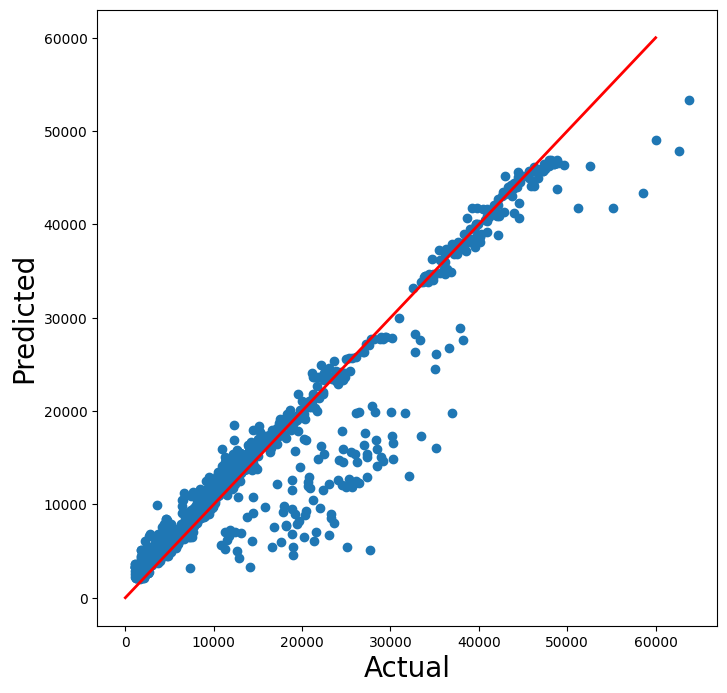

In [ ]:
y = data['charges']
X = data.drop('charges', axis=1)

#Train model
model = xgb.XGBRegressor(objective="reg:squarederror"
                         ,n_estimators=10) 
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 60000], [0, 60000], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)



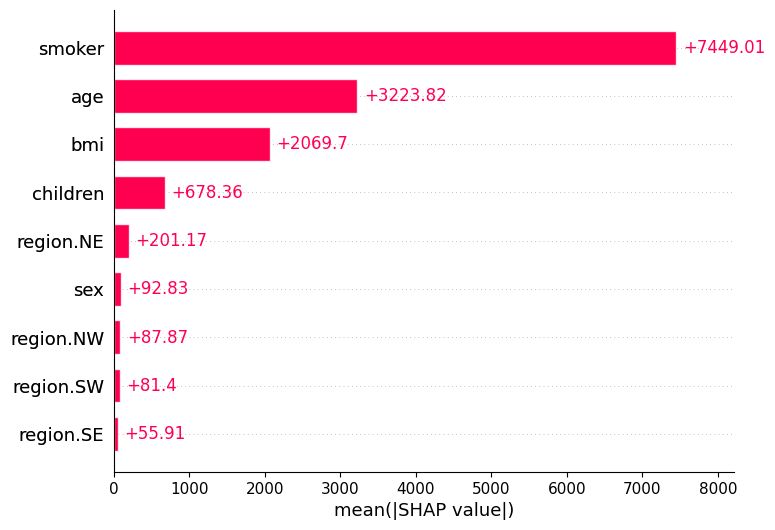

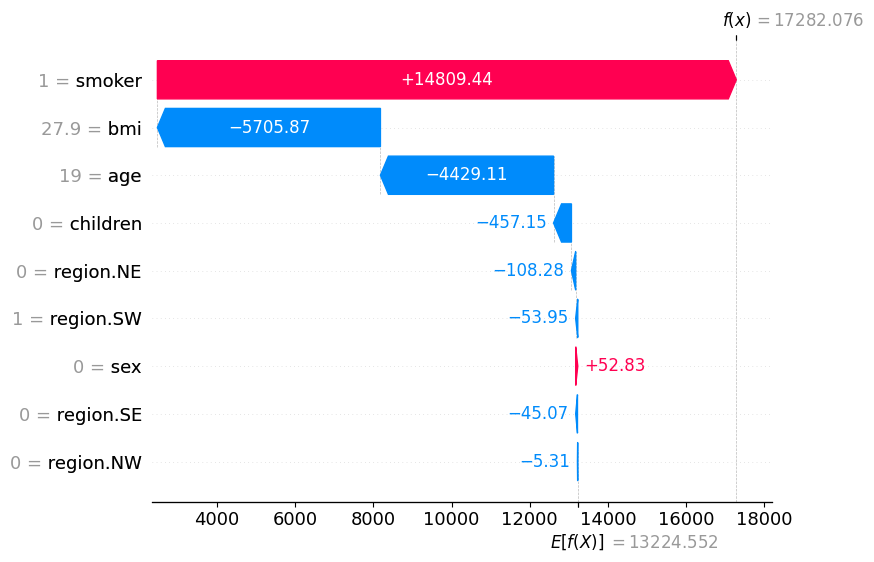

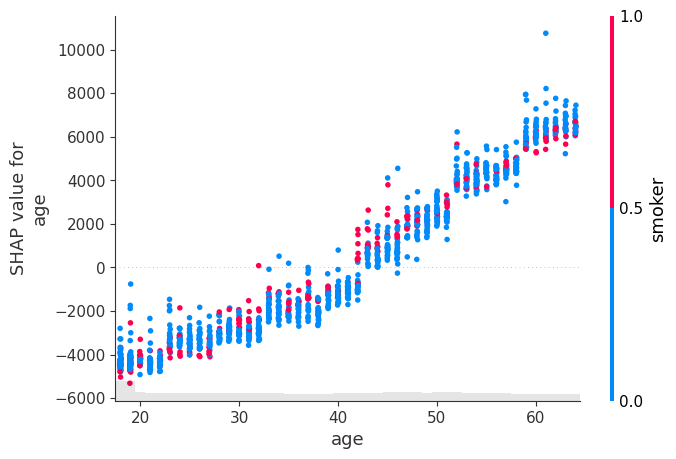

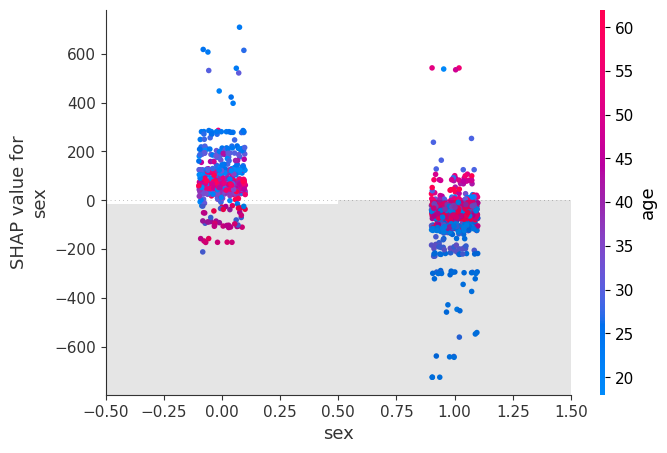

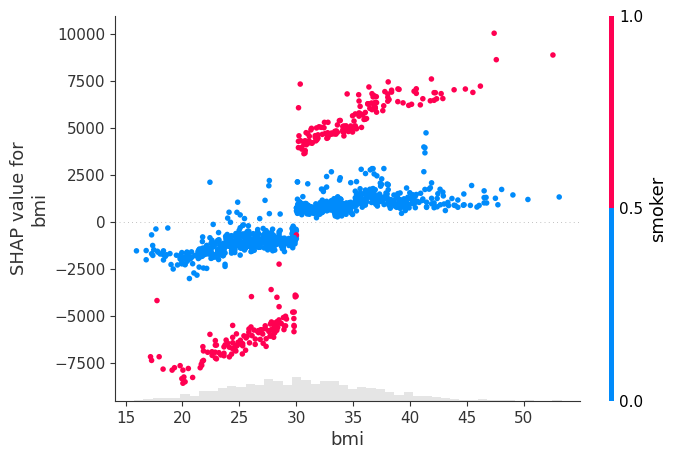

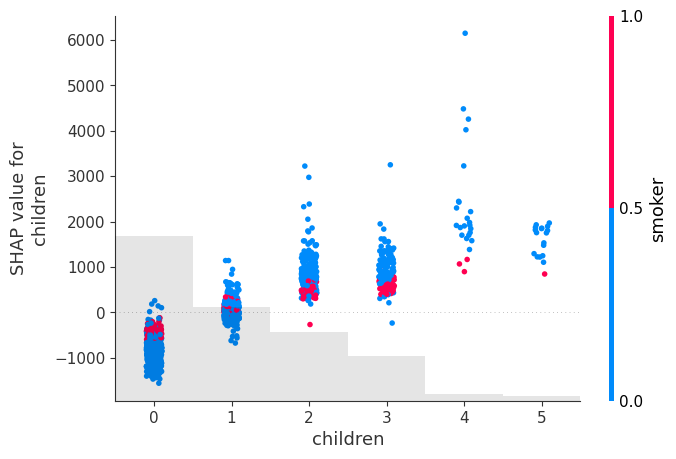

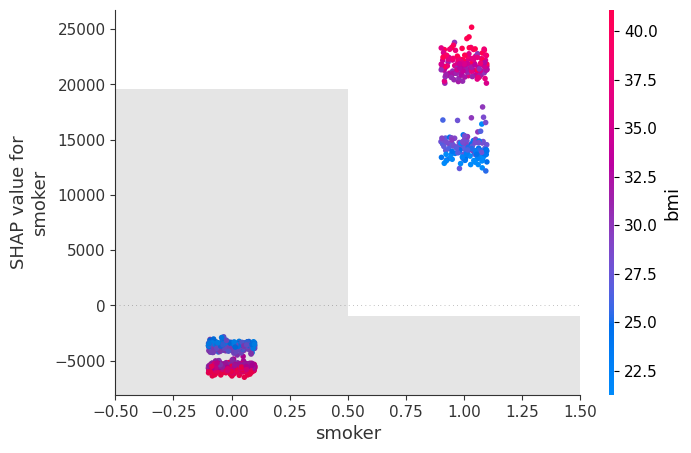

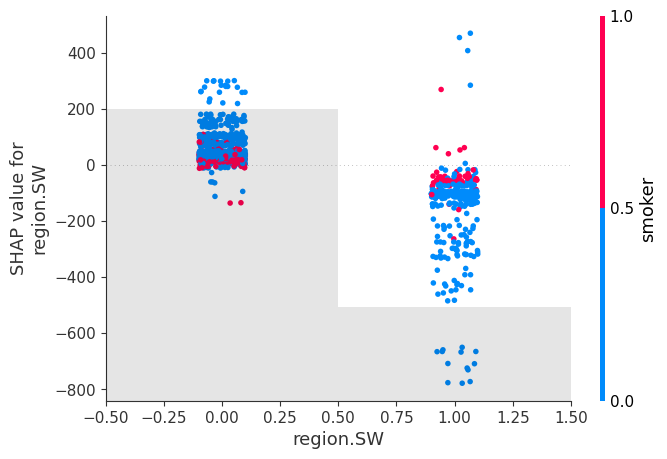

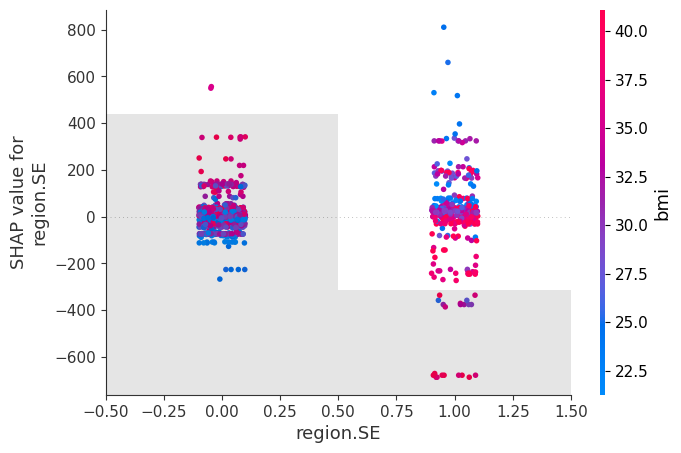

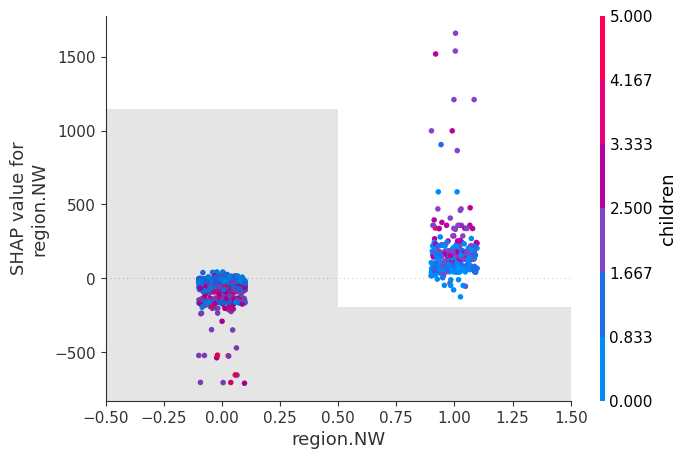

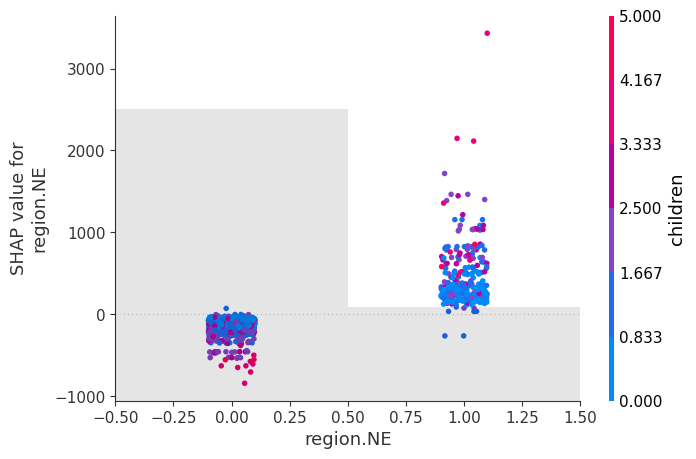

In [6]:
# **SHAP Analysis**

# 1. **`shap.Explainer`**

# Create a SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X)

# 2. **`shap.plots.bar`**

# Generate a bar plot of mean SHAP values
shap.plots.bar(shap_values, max_display=X.shape[1])

# 3. **`shap.plots.waterfall`**

# Generate a waterfall plot for the first observation
shap.plots.waterfall(shap_values[0])

# 4. **`shap.plots.scatter`**

# Generate scatter plots for each feature
for i in range(X.shape[1]):
    shap.plots.scatter(shap_values[:, i], color=shap_values)